Sistem Penilaian Kelayakan Kredit (Fuzzy Tsukamoto)
Hasil Defuzzifikasi: 0.30
Keputusan: Kredit Tidak Layak


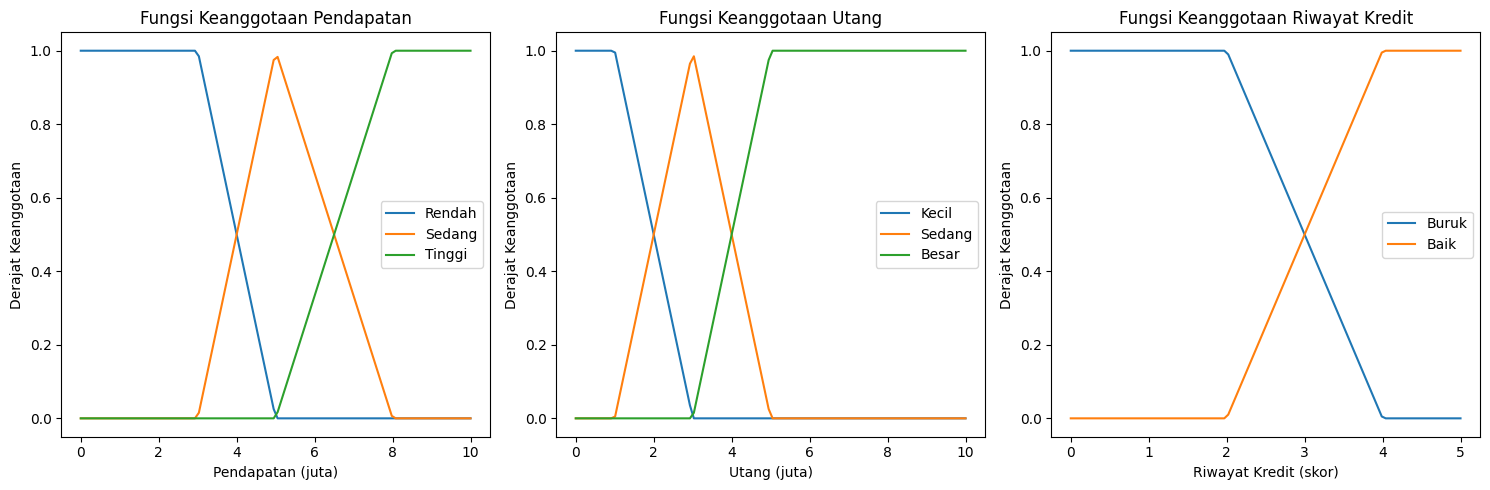

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class Fuzzification:
    @staticmethod
    def pendapatan(pendapatan):
        if pendapatan <= 3:
            rendah = 1
            sedang = 0
            tinggi = 0
        elif 3 < pendapatan <= 5:
            rendah = (5 - pendapatan) / 2
            sedang = (pendapatan - 3) / 2
            tinggi = 0
        elif 5 < pendapatan <= 8:
            rendah = 0
            sedang = (8 - pendapatan) / 3
            tinggi = (pendapatan - 5) / 3
        else:
            rendah = 0
            sedang = 0
            tinggi = 1

        return rendah, sedang, tinggi

    @staticmethod
    def utang(utang):
        if utang <= 1:
            kecil = 1
            sedang = 0
            besar = 0
        elif 1 < utang <= 3:
            kecil = (3 - utang) / 2
            sedang = (utang - 1) / 2
            besar = 0
        elif 3 < utang <= 5:
            kecil = 0
            sedang = (5 - utang) / 2
            besar = (utang - 3) / 2
        else:
            kecil = 0
            sedang = 0
            besar = 1

        return kecil, sedang, besar

    @staticmethod
    def riwayat(riwayat):
        if riwayat <= 2:
            buruk = 1
            baik = 0
        elif 2 < riwayat <= 4:
            buruk = (4 - riwayat) / 2
            baik = (riwayat - 2) / 2
        else:
            buruk = 0
            baik = 1

        return buruk, baik

class Inference:
    @staticmethod
    def rules(pendapatan, utang, riwayat):
        rendah, sedang, tinggi = Fuzzification.pendapatan(pendapatan)
        kecil, sedang_utang, besar = Fuzzification.utang(utang)
        buruk, baik = Fuzzification.riwayat(riwayat)

        rules = []

        # Rule 1: Jika Pendapatan Rendah DAN Utang Besar DAN Riwayat Buruk, maka Kredit Tidak Layak (0.2)
        rules.append((min(rendah, besar, buruk), 0.2))

        # Rule 2: Jika Pendapatan Sedang DAN Utang Sedang DAN Riwayat Baik, maka Kredit Layak (0.7)
        rules.append((min(sedang, sedang_utang, baik), 0.7))

        # Rule 3: Jika Pendapatan Tinggi DAN Utang Kecil DAN Riwayat Baik, maka Kredit Sangat Layak (1.0)
        rules.append((min(tinggi, kecil, baik), 1.0))

        # Rule 4: Jika Pendapatan Tinggi DAN Utang Besar DAN Riwayat Buruk, maka Kredit Tidak Layak (0.3)
        rules.append((min(tinggi, besar, buruk), 0.3))

        return rules

class Defuzzification:
    @staticmethod
    def calculate(rules):
        numerator = sum(strength * z for strength, z in rules)
        denominator = sum(strength for strength, z in rules)

        if denominator == 0:
            return 0  # Handle division by zero

        return numerator / denominator

class CreditEligibility:
    def __init__(self, pendapatan, utang, riwayat):
        self.pendapatan = pendapatan
        self.utang = utang
        self.riwayat = riwayat

    def evaluate(self):
        rules = Inference.rules(self.pendapatan, self.utang, self.riwayat)
        kelayakan = Defuzzification.calculate(rules)

        return kelayakan

    def plot_membership(self):
        pendapatan_range = np.linspace(0, 10, 100)
        utang_range = np.linspace(0, 10, 100)
        riwayat_range = np.linspace(0, 5, 100)

        pendapatan_rendah, pendapatan_sedang, pendapatan_tinggi = zip(*[Fuzzification.pendapatan(p) for p in pendapatan_range])
        utang_kecil, utang_sedang, utang_besar = zip(*[Fuzzification.utang(u) for u in utang_range])
        riwayat_buruk, riwayat_baik = zip(*[Fuzzification.riwayat(r) for r in riwayat_range])

        plt.figure(figsize=(15, 5))

        # Plot pendapatan
        plt.subplot(1, 3, 1)
        plt.plot(pendapatan_range, pendapatan_rendah, label='Rendah')
        plt.plot(pendapatan_range, pendapatan_sedang, label='Sedang')
        plt.plot(pendapatan_range, pendapatan_tinggi, label='Tinggi')
        plt.title('Fungsi Keanggotaan Pendapatan')
        plt.xlabel('Pendapatan (juta)')
        plt.ylabel('Derajat Keanggotaan')
        plt.legend()

        # Plot utang
        plt.subplot(1, 3, 2)
        plt.plot(utang_range, utang_kecil, label='Kecil')
        plt.plot(utang_range, utang_sedang, label='Sedang')
        plt.plot(utang_range, utang_besar, label='Besar')
        plt.title('Fungsi Keanggotaan Utang')
        plt.xlabel('Utang (juta)')
        plt.ylabel('Derajat Keanggotaan')
        plt.legend()

        # Plot riwayat kredit
        plt.subplot(1, 3, 3)
        plt.plot(riwayat_range, riwayat_buruk, label='Buruk')
        plt.plot(riwayat_range, riwayat_baik, label='Baik')
        plt.title('Fungsi Keanggotaan Riwayat Kredit')
        plt.xlabel('Riwayat Kredit (skor)')
        plt.ylabel('Derajat Keanggotaan')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Main Program
if __name__ == "__main__":
    print("Sistem Penilaian Kelayakan Kredit (Fuzzy Tsukamoto)")
    pendapatan = float(input("Masukkan Pendapatan Bulanan (dalam juta): "))
    utang = float(input("Masukkan Total Utang (dalam juta): "))
    riwayat = float(input("Masukkan Skor Riwayat Kredit (1-5): "))

    system = CreditEligibility(pendapatan, utang, riwayat)
    kelayakan = system.evaluate()

    print(f"Hasil Defuzzifikasi: {kelayakan:.2f}")
    if kelayakan >= 0.7:
        print("Keputusan: Kredit Sangat Layak")
    elif 0.4 <= kelayakan < 0.7:
        print("Keputusan: Kredit Layak")
    else:
        print("Keputusan: Kredit Tidak Layak")

    # Plot membership functions
    system.plot_membership()
